# Image Cropping

Here's a Jupyter Notebook code that will go through all images in a specified folder, crop them to a specified size, and save them in a new folder. Additionally, it will display a few of the cropped samples in the output for you to view.

Make sure you have Pillow (PIL) and matplotlib installed. If you don't have them, you can install them via pip:

In [ ]:
pip install pillow matplotlib


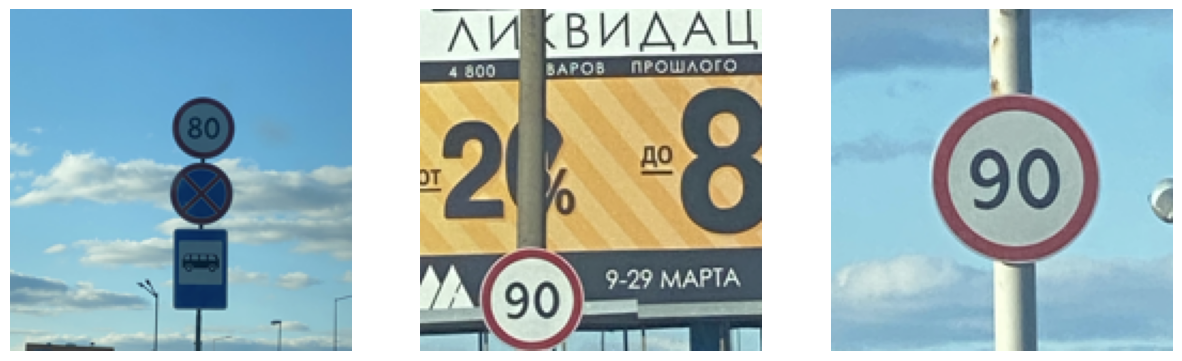

In [5]:
# Import required libraries
import os
from PIL import Image
import matplotlib.pyplot as plt

# Function to crop and save images
def crop_images(input_folder, output_folder, crop_size, show_samples=3):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Get list of image files in input folder
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    sample_images = []
    
    for idx, image_file in enumerate(image_files):
        # Open image
        img_path = os.path.join(input_folder, image_file)
        img = Image.open(img_path)

        # Get image dimensions and calculate crop box
        width, height = img.size
        left = (width - crop_size[0]) / 2
        top = (height - crop_size[1]) / 2
        right = (width + crop_size[0]) / 2
        bottom = (height + crop_size[1]) / 2

        # Crop the image
        cropped_img = img.crop((left, top, right, bottom))

        # Save cropped image in output folder
        cropped_img_path = os.path.join(output_folder, image_file)
        cropped_img.save(cropped_img_path)

        # Append first few samples to display later
        if idx < show_samples:
            sample_images.append(cropped_img)
        
    return sample_images

# Parameters
input_folder = 'inputs'  # Replace with your input folder path
output_folder = 'outputs'  # Replace with your output folder path
crop_size = (160, 160)  # Specify the desired crop size (width, height)

# Crop images and get the first few samples
cropped_samples = crop_images(input_folder, output_folder, crop_size, show_samples=3)

# Display the first few cropped images
fig, axes = plt.subplots(1, len(cropped_samples), figsize=(15, 5))

for i, img in enumerate(cropped_samples):
    axes[i].imshow(img)
    axes[i].axis('off')

plt.show()
